# Задание 1.1 - Метод К-ближайших соседей (K-neariest neighbor classifier)

В первом задании вы реализуете один из простейших алгоритмов машинного обучения - классификатор на основе метода K-ближайших соседей.
Мы применим его к задачам
- бинарной классификации (то есть, только двум классам)
- многоклассовой классификации (то есть, нескольким классам)

Так как методу необходим гиперпараметр (hyperparameter) - количество соседей, мы выберем его на основе кросс-валидации (cross-validation).

Наша основная задача - научиться пользоваться numpy и представлять вычисления в векторном виде, а также ознакомиться с основными метриками, важными для задачи классификации.

Перед выполнением задания:
- запустите файл `download_data.sh`, чтобы скачать данные, которые мы будем использовать для тренировки
- установите все необходимые библиотеки, запустив `pip install -r requirements.txt` (если раньше не работали с `pip`, вам сюда - https://pip.pypa.io/en/stable/quickstart/)

Если вы раньше не работали с numpy, вам может помочь tutorial. Например этот:  
http://cs231n.github.io/python-numpy-tutorial/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from dataset import load_svhn
from knn import KNN
from metrics import binary_classification_metrics, multiclass_accuracy

# Загрузим и визуализируем данные

В задании уже дана функция `load_svhn`, загружающая данные с диска. Она возвращает данные для тренировки и для тестирования как numpy arrays.

Мы будем использовать цифры из датасета Street View House Numbers (SVHN, http://ufldl.stanford.edu/housenumbers/), чтобы решать задачу хоть сколько-нибудь сложнее MNIST.

In [33]:
train_X, train_y, test_X, test_y = load_svhn("data", max_train=1000, max_test=100)

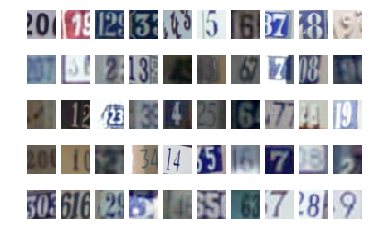

In [34]:
samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index]
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1

4
(32, 32, 3)


(-0.5, 31.5, 31.5, -0.5)

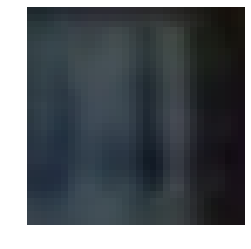

In [20]:
#binary_train_mask = (train_y == 0)
#print(binary_train_mask)
plt.subplot(1,1,1)
print(train_y[1])
img = train_X[1]
print(img.shape)
plt.imshow(img.astype(np.uint8))
plt.axis('off')

# Сначала реализуем KNN для бинарной классификации

В качестве задачи бинарной классификации мы натренируем модель, которая будет отличать цифру 0 от цифры 9.

In [37]:
# First, let's prepare the labels and the source data

# Only select 0s and 9s
binary_train_mask = (train_y == 0) | (train_y == 9)

binary_train_X = train_X[binary_train_mask]
binary_train_y = train_y[binary_train_mask] == 0

binary_test_mask = (test_y == 0) | (test_y == 9)

binary_test_X = test_X[binary_test_mask]
binary_test_y = test_y[binary_test_mask] == 0

# Reshape to 1-dimensional array [num_samples, 32*32*3]
binary_train_X = binary_train_X.reshape(binary_train_X.shape[0], -1)
binary_test_X = binary_test_X.reshape(binary_test_X.shape[0], -1)
#print(binary_test_X)

print(train_y[1])
print(test_y[binary_test_mask])

7
[0 0 0 0 9 0 9 9 0 9 0 9 9 9 0 9 0]


In [38]:
#print(binary_train_X[0])
# Create the classifier and call fit to train the model
# KNN just remembers all the data
knn_classifier = KNN(k=1)
knn_classifier.fit(binary_train_X, binary_train_y)

## Пришло время написать код! 

Последовательно реализуйте функции `compute_distances_two_loops`, `compute_distances_one_loop` и `compute_distances_no_loops`
в файле `knn.py`.

Эти функции строят массив расстояний между всеми векторами в тестовом наборе и в тренировочном наборе.  
В результате они должны построить массив размера `(num_test, num_train)`, где координата `[i][j]` соотвествует расстоянию между i-м вектором в test (`test[i]`) и j-м вектором в train (`train[j]`).

**Обратите внимание** Для простоты реализации мы будем использовать в качестве расстояния меру L1 (ее еще называют [Manhattan distance](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2)).

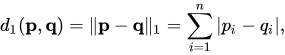

In [39]:
#print(knn_classifier.train_X.shape)

tr_X = np.array([[1, 2], [6,8], [7,1], [5,19], [5,3]]) 
te_X = np.array([[2,3], [8,1]])

n_train = tr_X.shape[0]
n_test = te_X.shape[0]

d = np.zeros((n_test,n_train),np.float32)
#print(d)
for i_test in range(te_X.shape[0]):
    for i_train in range(tr_X.shape[0]):
        d[i_test][i_train] = np.sum(np.abs(te_X[i_test] - tr_X[i_train]))
        
print(d)

# Пока изучим что к чему

# TODO: implement compute_distances_two_loops in knn.py
dists = knn_classifier.compute_distances_two_loops(binary_test_X)
#print(dists[0])
#print(np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

[[ 2.  9.  7. 19.  3.]
 [ 8.  9.  1. 21.  5.]]


In [40]:
#tr_X = np.array([[1, 2], [6,8], [7,1]]) 
#te_X = np.array([[2,3], [8,1]])

#n_train = tr_X.shape[0]
#n_test = te_X.shape[0]

#d = np.zeros((n_test,n_train),np.float32)
#print(d)
#dd = np.sum(np.abs(tr_X - te_X[0]), axis=1)
#print(dd)
#print(np.sum(dd, axis=1))

#for i_test in range(n_test):
#    d[i_test] = np.sum(np.abs(tr_X - te_X[i_test]), axis=1)

#print(d)

# TODO: implement compute_distances_one_loop in knn.py
dists = knn_classifier.compute_distances_one_loop(binary_test_X)
print(dists[0])
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))


[247047. 265148. 146231. 106730. 480888. 120109. 199862.  73964. 511087.
 242762. 123835. 176952. 176550. 490830. 173531. 223284. 351045. 108514.
 290232. 350256. 220514.  76801. 187426. 202332. 151591. 334301.  96051.
 148149. 326353. 179970. 170515. 145824. 307581. 112796. 175092. 251353.
  95731.  79460. 391397. 343105. 194266. 246587. 125093. 107490.  91880.
 379180.  90253. 200060. 173363. 107986. 195632. 296837. 317710. 219383.
 229309. 126649. 133124. 143423. 125004. 149037. 218329.  92302. 138890.
  86464. 394062. 225253. 285982. 217867. 484398. 200711. 162496. 546851.
 310447. 179126. 410472. 249359. 265077. 170266. 149826. 300230. 273497.
 293235. 161346. 178608. 439508. 406688. 291070. 129487. 232406.  85496.
 389599. 154616. 477404. 373652. 405372. 355618. 250390.  94754. 122224.
 151211. 325672. 218087. 278901.  93945. 235405. 198391. 256529.  94093.
 134555.  92364. 130831. 162719. 185954. 150812.  88168. 160766. 119876.
 278644. 415730. 150791. 353129. 231671. 197808. 37

In [41]:
#tr_X = np.array([[1, 2], [6,8], [7,1], [5,19], [5,3]]) 
#te_X = np.array([[2,3], [8,1]])


#print()


#n_train = tr_X.shape[0]
#n_test = te_X.shape[0]

#print(n_train)
#print(n_test)
#xx = np.expand_dims(te_X, axis=1)

#print(np.sum(np.abs(tr_X - xx), axis=2))
#print(tr_X - xx)

#k = tr_X - te_X[0]
#d = np.subtract(tr_X, te_X[0])

#d = np.zeros((n_test,n_train),np.float32)
#print(k)
#print(d)
#x1 = np.arange(9.0).reshape(3,3)
#x2 = np.arange(3.0)

#print(x2[:,np.newaxis])
#dd = np.sum(np.abs(tr_X - te_X), axis=1)
#print(dd)

#for i_test in range(n_test):
#    d[i_test] = np.sum(np.abs(tr_X - te_X[i_test]), axis=1)

#print(d)

# TODO: implement compute_distances_no_loops in knn.py
dists = knn_classifier.compute_distances_no_loops(binary_test_X)
#print(dists[0])
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))


In [11]:
# Lets look at the performance difference
%timeit knn_classifier.compute_distances_two_loops(binary_test_X)
%timeit knn_classifier.compute_distances_one_loop(binary_test_X)
%timeit knn_classifier.compute_distances_no_loops(binary_test_X)

10.4 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.72 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.05 ms ± 248 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [42]:
# TODO: implement predict_labels_binary in knn.py
#print(binary_test_X.shape)

#print(knn_classifier.train_X.shape)
prediction = knn_classifier.predict(binary_test_X)
#print(np.argsort(prediction[8]))
#print(prediction[8][106], prediction[7][73])

#print(binary_test_y)
#print(prediction)

# что за трениров картинки?
#plot_index = 1
#plt.subplot(1,10,plot_index)
#img = knn_classifier.train_X[106].reshape(32,32,3)
#print(img.shape)
#plt.imshow(img.astype(np.uint8))
#plt.axis('off')
#plot_index += 1
#print(knn_classifier.train_y[106])
    


True
True
True
True
False
True
False
False
True


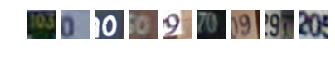

In [43]:
# что за binary_test_X ?
plot_index = 1
for i in range(9):
    plt.subplot(1,10,plot_index)
    img = binary_test_X[i].reshape(32,32,3)
    #print(img.shape)
    plt.imshow(img.astype(np.uint8))
    plt.axis('off')
    plot_index += 1
    print(binary_test_y[i])

In [44]:

# TODO: implement binary_classification_metrics in metrics.py
accuracy, precision, recall, f1 = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 1
Accuracy: 0.59, Precision: 0.58, Recall: 0.78, F1: 0.67


In [45]:
# Let's put everything together and run KNN with k=3 and see how we do
knn_classifier_3 = KNN(k=3)
knn_classifier_3.fit(binary_train_X, binary_train_y)
prediction = knn_classifier_3.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier_3.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 3
Accuracy: 0.71, Precision: 0.71, Recall: 0.75, F1: 0.67


# Кросс-валидация (cross-validation)

Попробуем найти лучшее значение параметра k для алгоритма KNN! 

Для этого мы воспользуемся k-fold cross-validation (https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation). Мы разделим тренировочные данные на 5 фолдов (folds), и по очереди будем использовать каждый из них в качестве проверочных данных (validation data), а остальные -- в качестве тренировочных (training data).

В качестве финальной оценки эффективности k мы усредним значения F1 score на всех фолдах.
После этого мы просто выберем значение k с лучшим значением метрики.

*Бонус*: есть ли другие варианты агрегировать F1 score по всем фолдам? Напишите плюсы и минусы в клетке ниже.

In [59]:
from collections import Counter
# Find the best k using cross-validation based on F1 score
num_folds = 4
print(binary_train_y.shape)
train_folds_X = np.split(binary_train_X, num_folds)
train_folds_y = np.split(binary_train_y, num_folds)
# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y

k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_f1 = {}  # dict mapping k values to mean F1 scores (int -> float)

for k in k_choices:
    knn_classifier_k = KNN(k=k)
    f1_by_k = 0
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for training
    # Perform training and produce F1 score metric on the validation dataset
    # Average F1 from all the folds and write it into k_to_f1
    for num_f in range(num_folds):
        f_test_X = train_folds_X[num_f]
        f_test_y = train_folds_y[num_f]
        if num_f == 0:
            f_train_X = np.concatenate(train_folds_X[(num_f+1):num_folds])
            f_train_y = np.concatenate(train_folds_y[(num_f+1):num_folds])
        else:
            if (num_f+1) == num_folds:
                f_train_X = np.concatenate(train_folds_X[0:num_f])
                f_train_y = np.concatenate(train_folds_y[0:num_f])
            else:
                f_train_X = np.concatenate([
                    np.concatenate(train_folds_X[0:num_f]), 
                    np.concatenate(train_folds_X[(num_f+1):num_folds])
                ])
                f_train_y = np.concatenate([
                    np.concatenate(train_folds_y[0:num_f]), 
                    np.concatenate(train_folds_y[(num_f+1):num_folds])
                ])
        knn_classifier_k.fit(f_train_X, f_train_y)
        prediction_k = knn_classifier_k.predict(f_test_X)
        
        precision, recall, f1, accuracy = binary_classification_metrics(prediction_k, f_test_y)
        #print(precision, recall)
        #print(2*precision*recall / (precision + recall))
        f1_by_k += f1
    k_to_f1[k] = f1_by_k/num_folds

for k in sorted(k_to_f1):
    print('k = %d, f1 = %f' % (k, k_to_f1[k]))
    
print(Counter(k_to_f1).most_common(1))

(124,)
k = 1, f1 = 0.556162
k = 2, f1 = 0.556162
k = 3, f1 = 0.634559
k = 5, f1 = 0.566632
k = 8, f1 = 0.539671
k = 10, f1 = 0.612885
k = 15, f1 = 0.610924
k = 20, f1 = 0.630567
k = 25, f1 = 0.549965
k = 50, f1 = 0.235539
[(3, 0.6345588235294117)]


### Проверим, как хорошо работает лучшее значение k на тестовых данных (test data)

In [60]:
# TODO Set the best k to the best value found by cross-validation
best_k = 3

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(binary_train_X, binary_train_y)
prediction = best_knn_classifier.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

Best KNN with k = 3
Accuracy: 0.83, Precision: 0.71, Recall: 0.75, F1: 0.67


# Многоклассовая классификация (multi-class classification)

Переходим к следующему этапу - классификации на каждую цифру.

In [61]:
# Now let's use all 10 classes
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

knn_classifier = KNN(k=1)
knn_classifier.fit(train_X, train_y)

print(train_y)

[0 7 4 2 0 1 5 8 0 4 8 0 4 1 1 3 4 1 1 9 5 1 9 8 2 1 2 8 5 5 8 6 3 7 1 2 7
 2 1 0 4 0 1 9 3 0 1 1 1 5 0 4 3 8 3 1 1 3 7 1 1 3 7 8 3 2 1 4 9 0 5 4 5 1
 7 9 9 3 4 1 4 2 5 5 5 3 7 1 4 7 2 1 1 6 5 3 0 9 9 5 5 3 1 2 4 6 2 7 5 7 1
 4 0 8 2 6 4 2 1 3 6 7 2 0 5 0 2 1 6 8 2 0 6 3 1 9 5 2 9 2 1 1 4 6 7 3 1 6
 1 5 3 4 5 3 1 8 5 7 9 1 1 2 8 5 9 3 3 5 1 5 8 4 8 6 9 7 8 1 4 5 7 4 0 4 6
 1 3 3 6 9 1 9 2 2 6 9 1 1 3 1 2 5 3 1 9 5 6 3 9 2 6 8 1 3 0 1 7 9 7 3 3 3
 4 1 3 8 9 3 7 6 1 2 2 7 0 6 2 1 3 8 8 4 5 5 1 6 4 1 1 5 5 3 1 2 7 9 0 1 5
 4 1 2 5 6 1 5 2 0 3 2 8 6 1 8 1 2 7 3 9 3 1 3 1 8 1 0 4 6 2 6 8 2 8 3 9 4
 3 5 8 1 0 9 5 5 4 6 1 2 6 7 9 3 1 9 6 0 1 7 1 2 6 5 3 2 0 2 3 0 4 8 1 1 1
 1 6 1 1 3 4 4 6 1 4 1 6 3 1 9 3 2 5 4 2 5 8 1 1 9 3 1 1 3 1 3 1 3 7 7 2 9
 8 5 8 3 1 8 1 1 3 1 0 6 1 1 3 1 1 5 7 6 3 6 0 6 8 1 1 1 0 2 4 6 3 5 1 1 2
 5 2 5 3 3 0 1 1 4 8 3 2 5 3 9 5 7 1 8 4 1 1 6 1 2 2 6 7 8 3 2 9 9 4 1 8 6
 8 5 6 8 2 8 4 2 3 9 5 1 4 5 3 5 8 4 3 8 3 2 1 3 5 3 7 8 1 4 3 3 6 2 0 4 5
 3 6 4 4 1 3 8 9 8 5 7 7 

[1 4 2 7 3 1 7 3 4 1 2 5 3 1 5 9 0 2 9 2 4 9 5 1 9 4 1 7 0 5 3 3 1 9 1 9 3
 8 8 6 5 3 1 5 2 4 2 0 1 4 8 1 1 3 3 6 9 1 8 0 3 1 3 8 0 1 3 4 4 3 1 4 2 2
 3 6 9 2 1 8 3 1 3 6 8 2 6 6 3 3 6 0 1 5 6 0 2 1 6 5]
2
1
7
7
8
1
7
8
1
5
2
1
3
1
5
6
1
1
8
2


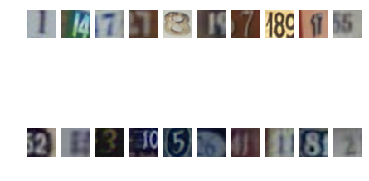

In [69]:
# TODO: Implement predict_labels_multiclass
predict = knn_classifier.predict(test_X)

print(predict)

plot_index = 1
for i in range(20):
    plt.subplot(2,10,plot_index)
    img = test_X[i].reshape(32,32,3)
    #print(img.shape)
    plt.imshow(img.astype(np.uint8))
    plt.axis('off')
    plot_index += 1
    print(test_y[i])

In [72]:
accuracy = multiclass_accuracy(predict, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.30


Снова кросс-валидация. Теперь нашей основной метрикой стала точность (accuracy), и ее мы тоже будем усреднять по всем фолдам.

In [73]:
from collections import Counter
# Find the best k using cross-validation based on F1 score
num_folds = 4
print(binary_train_y.shape)
train_folds_X = np.split(binary_train_X, num_folds)
train_folds_y = np.split(binary_train_y, num_folds)

k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_accuracy = {}

for k in k_choices:
    knn_classifier_k = KNN(k=k)
    a_by_k = 0
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for validation
    # Perform training and produce F1 score metric on the validation dataset
    # Average F1 from all the folds and write it into k_to_f1
    for num_f in range(num_folds):
        f_test_X = train_folds_X[num_f]
        f_test_y = train_folds_y[num_f]
        if num_f == 0:
            f_train_X = np.concatenate(train_folds_X[(num_f+1):num_folds])
            f_train_y = np.concatenate(train_folds_y[(num_f+1):num_folds])
        else:
            if (num_f+1) == num_folds:
                f_train_X = np.concatenate(train_folds_X[0:num_f])
                f_train_y = np.concatenate(train_folds_y[0:num_f])
            else:
                f_train_X = np.concatenate([
                    np.concatenate(train_folds_X[0:num_f]), 
                    np.concatenate(train_folds_X[(num_f+1):num_folds])
                ])
                f_train_y = np.concatenate([
                    np.concatenate(train_folds_y[0:num_f]), 
                    np.concatenate(train_folds_y[(num_f+1):num_folds])
                ])
        knn_classifier_k.fit(f_train_X, f_train_y)
        prediction_k = knn_classifier_k.predict(f_test_X)
        
        accuracy = multiclass_accuracy(prediction_k, f_test_y)
        #print(precision, recall)
        #print(2*precision*recall / (precision + recall))
        a_by_k += accuracy
    k_to_accuracy[k] = a_by_k/num_folds

for k in sorted(k_to_f1):
    print('k = %d, accuracy = %f' % (k, k_to_accuracy[k]))
    
print(Counter(k_to_accuracy).most_common(1))

(124,)
k = 1, accuracy = 0.548387
k = 2, accuracy = 0.548387
k = 3, accuracy = 0.572581
k = 5, accuracy = 0.580645
k = 8, accuracy = 0.580645
k = 10, accuracy = 0.588710
k = 15, accuracy = 0.564516
k = 20, accuracy = 0.588710
k = 25, accuracy = 0.540323
k = 50, accuracy = 0.491935
[(10, 0.5887096774193549)]


### Финальный тест - классификация на 10 классов на тестовой выборке (test data)

Если все реализовано правильно, вы должны увидеть точность не менее **0.2**.

In [74]:
# TODO Set the best k as a best from computed
best_k = 10

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(train_X, train_y)
prediction = best_knn_classifier.predict(test_X)

# Accuracy should be around 20%!
accuracy = multiclass_accuracy(prediction, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.29
